In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from autoencoder import Autoencoder

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_shape = x_train.shape[1:]

print (x_train.shape)
print (x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [3]:
input_dim = x_train.shape[1]

In [4]:
encoding_dim = 2
epochs = 50
batch_size = 256

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=[128, 128], 
                        decoder_layers=[128, 128],
                        loss='mse', # binary_crossentropy
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 4s 8ms/step - loss: 0.0654 - val_loss: 0.0414
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0356 - val_loss: 0.0321
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0306 - val_loss: 0.0285
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0275 - val_loss: 0.0262
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0258 - val_loss: 0.0249
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0248 - val_loss: 0.0239
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0239 - val_loss: 0.0235
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0232 - val_loss: 0.0227
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0226 - val_loss: 0.0222
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0221 - val_loss: 0.0218

313/313 [==============================] - 0s 1ms/step
Plot saved to experiments/50epochs_256batchsize_8encodingdim_leaky_reluactfunc_[128, 128]encoders_[128, 128]decoders_2d.png


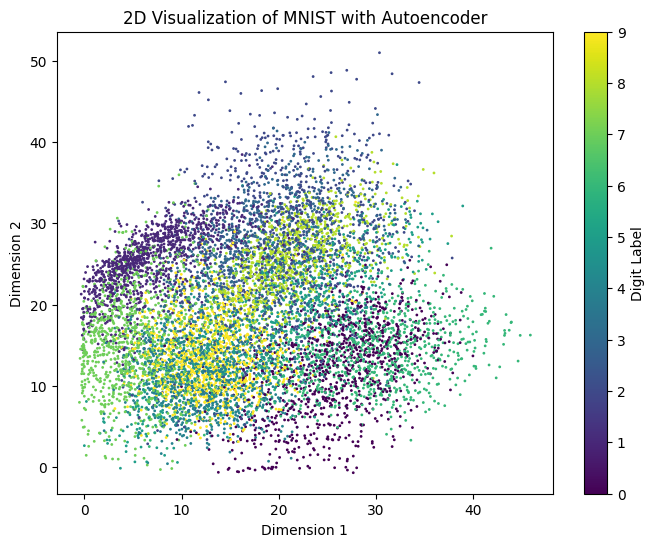

In [5]:
autoencoder.visualize_2d(x_test, y_test, True)

In [6]:
# autoencoder.visualize_3d(x_test, y_test, True)

Compression and decompression

In [7]:
encoded_data = autoencoder.compress(x_test)

313/313 [==============================] - 0s 1ms/step


In [8]:
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 856us/step


In [9]:
print("Original data shape:", x_test.shape)
print("Encoded data shape:", encoded_data.shape)
print("Decoded data shape:", decoded_data.shape)

Original data shape: (10000, 784)
Encoded data shape: (10000, 8)
Decoded data shape: (10000, 784)


In [10]:
def plot_comparison(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

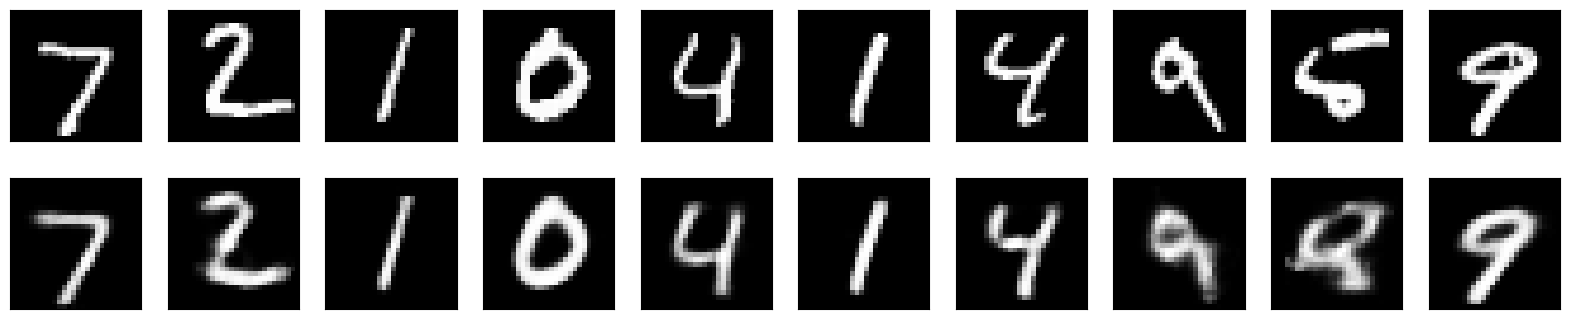

In [11]:
plot_comparison(x_test, decoded_data)

Image generation

1/1 [==============================] - 0s 10ms/step


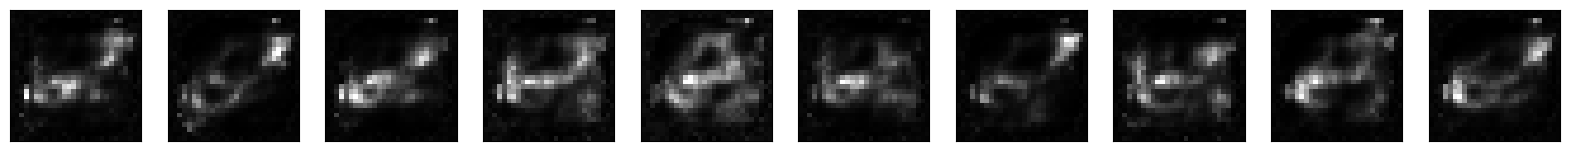

In [12]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()